# WeatherPy
----

### Analysis
* Maximum temperatures per city increase with cities on latitudes closer to the equator (0).
* There is no apparent correlation between a city's latitude and the level of humidity in that city.
* There is no apparent correlation between a city's latitude and the wind speed in that city. Generally, the majority of cities have a wind speed of 20 mph or less.

In [1]:
# establish dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import openweathermapy.core as owm
from datetime import datetime
import os

# import your API key that you have hopefully entered
from api_keys import api_key

# incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# create folder for output csv
if not os.path.exists("output_data"):
    os.makedirs("output_data")

# define output file
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# create blank lists for lat_lngs and cities
lat_lngs = []
cities = []

# randomly generate lat and lng combos
lats = np.random.uniform(low=-90.000, high=90.000, size=1500) 
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500) 
lat_lngs = zip(lats, lngs)

# identify cities nearest to eacy lat/lng combo
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # ensure no cities are repeated
    if city not in cities:
        cities.append(city)      

# print the city count; should be over 500
print(len(cities))

627


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# define settings for calls
settings = {"units": "imperial", "appid": api_key}

# create empty arrays to store each weather value
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
counter = 0
setnum = 1

# perform weather check on each city 
# generate print log of each city as it's being processed 
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    try:
        weather_data = owm.get_current(city, **settings)
        cloudiness.append(weather_data("clouds.all"))
        country.append(weather_data("sys.country"))
        date.append(weather_data("dt"))
        humidity.append(weather_data("main.humidity"))
        lat.append(weather_data("coord.lat"))
        lng.append(weather_data("coord.lon"))
        max_temp.append(weather_data("main.temp_max"))
        wind_speed.append(weather_data("wind.speed"))
        if counter < 50:
            counter = counter + 1
        else:
            counter = 1
            setnum = setnum + 1
            time.sleep(60) # delay for one minute after 50 calls
        print(f"Processing Record {counter} of Set {setnum} | {city}")
        
    except:
        print("City not found. Skipping...")
        cloudiness.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        humidity.append(np.nan)
        lat.append(np.nan)
        lng.append(np.nan)
        max_temp.append(np.nan)
        wind_speed.append(np.nan)
        
print("-----------------------------")    
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
City not found. Skipping...
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 1 | arraial do cabo
Processing Record 2 of Set 1 | lavrentiya
Processing Record 3 of Set 1 | codrington
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | siddapur
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | wollongong
City not found. Skipping...
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | igarka
Processing Record 11 of Set 1 | touros
Processing Record 12 of Set 1 | pleshanovo
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | cullen
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | constitucion
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | luderitz
Processing Record 19 of Set 1 | sinnamary
Processing Record 20 of Set 1 | mar del plata
Proce

Processing Record 32 of Set 4 | kisangani
Processing Record 33 of Set 4 | tiksi
Processing Record 34 of Set 4 | guadalupe y calvo
Processing Record 35 of Set 4 | mastic beach
Processing Record 36 of Set 4 | oktyabrskoye
Processing Record 37 of Set 4 | qeshm
City not found. Skipping...
Processing Record 38 of Set 4 | gilbues
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | nishihara
Processing Record 41 of Set 4 | rundu
Processing Record 42 of Set 4 | suez
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | ngunguru
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | nuevo progreso
Processing Record 47 of Set 4 | provideniya
Processing Record 48 of Set 4 | margate
Processing Record 49 of Set 4 | sacalum
Processing Record 50 of Set 4 | forbes
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | kaura namoda
Processing Record 3 of Set 5 | launceston
Processing Record 4 of Set 5 | nelson bay
Processing Record 

Processing Record 18 of Set 8 | sieradz
Processing Record 19 of Set 8 | hasaki
Processing Record 20 of Set 8 | menongue
Processing Record 21 of Set 8 | meadow lake
City not found. Skipping...
City not found. Skipping...
Processing Record 22 of Set 8 | sao paulo de olivenca
City not found. Skipping...
Processing Record 23 of Set 8 | erenhot
Processing Record 24 of Set 8 | hirtshals
Processing Record 25 of Set 8 | maceio
City not found. Skipping...
Processing Record 26 of Set 8 | aksu
Processing Record 27 of Set 8 | ukiah
Processing Record 28 of Set 8 | marsabit
Processing Record 29 of Set 8 | chapais
Processing Record 30 of Set 8 | baherden
Processing Record 31 of Set 8 | kenmare
Processing Record 32 of Set 8 | onokhino
Processing Record 33 of Set 8 | polyarnyye zori
Processing Record 34 of Set 8 | fort nelson
Processing Record 35 of Set 8 | brenham
Processing Record 36 of Set 8 | enshi
Processing Record 37 of Set 8 | harer
Processing Record 38 of Set 8 | kalanguy
Processing Record 39 o

Processing Record 49 of Set 11 | bhadrak
Processing Record 50 of Set 11 | varhaug
City not found. Skipping...
Processing Record 1 of Set 12 | lodja
Processing Record 2 of Set 12 | adre
Processing Record 3 of Set 12 | hay river
Processing Record 4 of Set 12 | kalianget
Processing Record 5 of Set 12 | komsomolskiy
City not found. Skipping...
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame

In [27]:
# create df from results
citydf = pd.DataFrame(list(zip(cities, cloudiness, country, date, humidity, 
                               lat, lng, max_temp, wind_speed)), 
                      columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng',
                              'Max Temp','Wind Speed'])

# remove rows with null values and reset index
citydf = citydf.dropna(how='any') 
citydf = citydf.reset_index(drop=True)

# export df to a csv file
citydf.to_csv(output_data_file, sep=',')

# convert date for graph titles
current_date = citydf["Date"][0]
today = datetime.utcfromtimestamp(current_date).strftime('%m/%d/%y')

# force date formatting to remove scientific notation
citydf['Date'] = citydf['Date'].map('{:.0f}'.format)

# change cloudiness and humidity values to int
citydf['Cloudiness'] = citydf['Cloudiness'].astype('int64')
citydf['Humidity'] = citydf['Humidity'].astype('int64')

# print df head
citydf.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,arraial do cabo,0,BR,1540224000,50,-22.970,-42.020,78.800,16.110
1,lavrentiya,8,RU,1540226072,100,65.580,-170.990,37.250,24.520
2,codrington,0,AU,1540226072,95,-28.950,153.240,55.700,2.370
3,punta arenas,0,CL,1540224000,89,-53.160,-70.910,48.200,6.930
4,rikitea,80,PF,1540226073,100,-23.120,-134.970,70.460,4.720


### Plotting the Data

#### Latitude vs. Temperature Plot

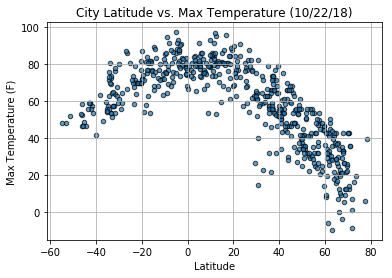

In [28]:
# plot lat vs temp, save as png, and display
citydf.plot(kind="scatter", x="Lat", y="Max Temp", 
         grid=True, alpha=0.7, edgecolors="black", title=(f"City Latitude vs. Max Temperature ({today})"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('MaxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

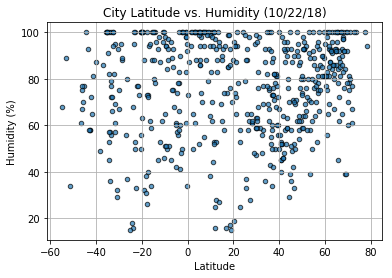

In [29]:
# plot lat vs humidity, save as png, and display
fig = citydf.plot(kind="scatter", x="Lat", y="Humidity", 
         grid=True, alpha=0.7, edgecolors="black", title=(f"City Latitude vs. Humidity ({today})"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

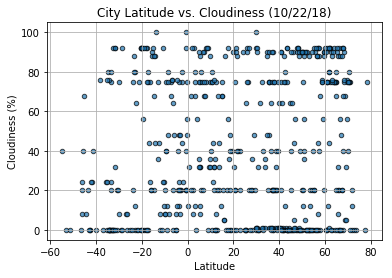

In [30]:
# plot lat vs cloudiness, save as png, and display
citydf.plot(kind="scatter", x="Lat", y="Cloudiness", #s = (df3.Driver_Count*10), c=df3.Type_Color,
         grid=True, alpha=0.7, edgecolors="black", title=(f"City Latitude vs. Cloudiness ({today})"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

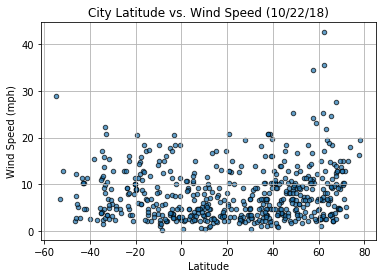

In [31]:
# plot lat vs wind spd, save as png, and display
citydf.plot(kind="scatter", x="Lat", y="Wind Speed", 
         grid=True, alpha=0.7, edgecolors="black", title=(f"City Latitude vs. Wind Speed ({today})"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('WindSpd.png')
plt.show()